
<center><h2>The mission statement</h2></center> 

<center><h4> The bike sharing company wants to analyze their user data to find the main differences in behaviour between their two types of users, the “casual” who pays for each ride and the annual member who pays a yearly subscription to the service.</h4></center> 


## PHASE 1 : ASK
### Key objectives:

**1.Identify the business task:**

* The company wants to improve their earnings reaching out to their “casual” riders, and for that they have to analyze in what aspects the “casual” and the annual customers differ, to be able to create a focused and successful marketing message to the “casual” customers that makes them change to the annual subscription.

**2.Consider key stakeholders:**

* The main stakeholders here are the director of marketing and my manager Lily Moreno, the rest of the marketing analytics team, and the Cyclistic executive team.

**3.The business task:**

Given these facts, the business task is defined as searching for differences in the two identified kinds of users in order to make a focused marketing campaign to the “casual” users in order for them to change to the annual subscription, or resumed in a question:

**¿What could motivate the “casual” users to change to an annual subscription based on their behavior?**


## PHASE 2 : Prepare

### Key objectives:

**1.Determine the credibility of the data:**

* The data is public data from a bike sharing company. It starts from January 2022 until December 2022 (12 months), there isn't much of a naming convention as the files are sometimes organized by quarter, or month, or the whole year and their names vary a lot. The naming of the columns also changes and there are some columns added and deleted over the years. Nevertheless the data seems to be in good condition and its first hand data collected by the company itself with lots of entries and with lots of useful data.

**2.Sort and filter the data:**

* For this analysis I'm going to focus on the 2022 period as it's the more relevant period to the business task and it has the more complete data with geo-location coordinates, and types of bike used.

In [1]:
#First I add all the libraries necessary to my analysis
import pandas as pd
import numpy as np
import glob
from datetime import datetime
from math import radians, sin, cos, sqrt, atan2
import matplotlib.pyplot as plt
import seaborn as sns
import folium
sns.set()
FIG_SIZE=(10, 5)

In [ ]:
#I load all the data to their respective variables
csv_files = glob.glob('Data/*.csv')
data = []
for file in csv_files:
    d = pd.read_csv(file)
    data.append(d)

In [ ]:
# Join the data into a single DataFrame
df = pd.concat(data)

## PHASE 3 : Process

### Key objectives:

**1.Clean the data, and prepare the data for analysis:**

* Now that we have all the data in one place we can start to clean the data of possible errors like NA. Also we will make some changes to the data adding useful new columns based on calculations of already existing columns in order to facilitate our analysis and arrive at more insightful conclusions.

In [5]:
#Lets see first 100 rows of the df
df[:100]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9363,B3A40F397AA7B6A3,classic_bike,2022-08-02 21:37:41,2022-08-02 21:40:51,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual
9665,2BE1CD46545983B7,classic_bike,2022-08-28 19:22:11,2022-08-28 20:42:17,Vernon Ave & 107th St,20109,Vernon Ave & 107th St,20109,41.700121,-87.612260,41.700121,-87.612260,casual
9682,31138B8EA6833B02,electric_bike,2022-08-29 16:24:24,2022-08-29 16:25:57,California Ave & Division St,13256,California Ave & Division St,13256,41.903038,-87.697480,41.903029,-87.697474,casual
9702,E8115DDA57E44BC1,electric_bike,2022-08-29 08:47:24,2022-08-29 08:54:30,California Ave & Milwaukee Ave,13084,California Ave & Division St,13256,41.922642,-87.697145,41.903029,-87.697474,casual


In [6]:
# summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4369360 entries, 142 to 701338
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 466.7+ MB


In [7]:
#Now lets clean the data to be able to properly work with it:
df.dropna(inplace=True)

# Convert the 'started_at' column to datetime format
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])

# Extract month, day, year, and day of the week
df['month'] = df['started_at'].dt.strftime('%m')
df['day'] = df['started_at'].dt.strftime('%d')
df['year'] = df['started_at'].dt.strftime('%Y')
df['day_of_week'] = df['started_at'].dt.strftime('%A')

# Calculate the ride length in seconds
df['ride_length'] = (df['ended_at'] - df['started_at']).dt.total_seconds()

# Define a function to calculate the distance between two sets of latitude and longitude
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert coordinates to radians
    lat1_rad = radians(lat1)
    lon1_rad = radians(lon1)
    lat2_rad = radians(lat2)
    lon2_rad = radians(lon2)

    # Haversine formula
    dlon = lon2_rad - lon1_rad
    dlat = lat2_rad - lat1_rad
    a = sin(dlat / 2) ** 2 + cos(lat1_rad) * cos(lat2_rad) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = 6371 * c  # Earth radius in kilometers
    return distance

# Calculate the ride distance traveled in kilometers
df['ride_distance'] = df.apply(lambda row: calculate_distance(row['start_lat'], row['start_lng'], row['end_lat'], row['end_lng']), axis=1)


# Calculate the ride speed in km/h
df['ride_speed'] = df['ride_distance'] / (df['ride_length'] / 3600)


In [9]:
# The dataframe includes entires when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative:
# Filter out the unwanted entries
df = df[~(df['start_station_name'] == "HQ QR") & ~(df['ride_length'] < 0)]

## PHASE 4 : Analyze

### Key objectives:

**1.Identify trends and relationships.:**

* We have now a complete data frame with all the info we need to identify the differences in behaviour between the casual and the member users.

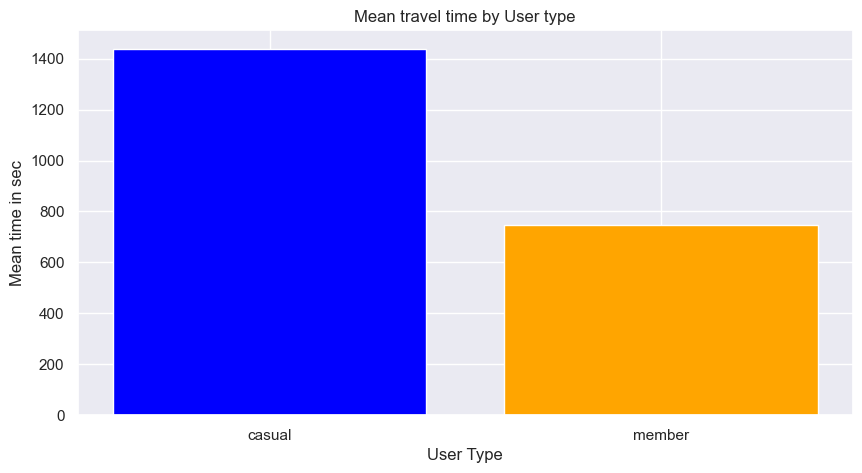

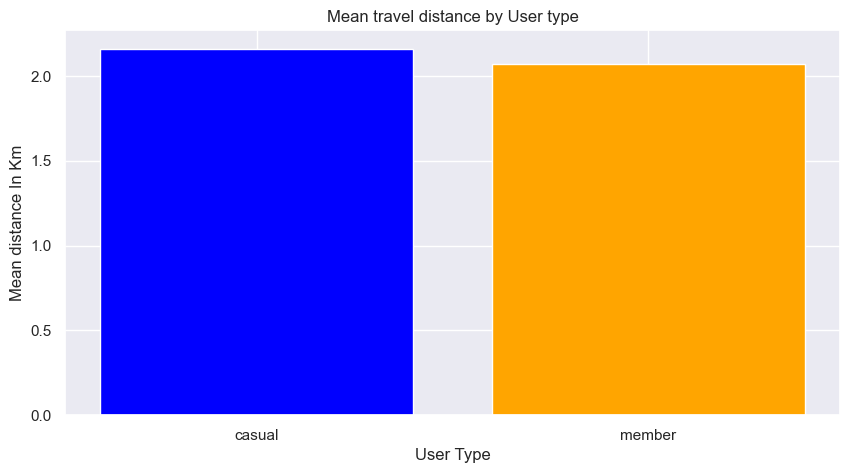

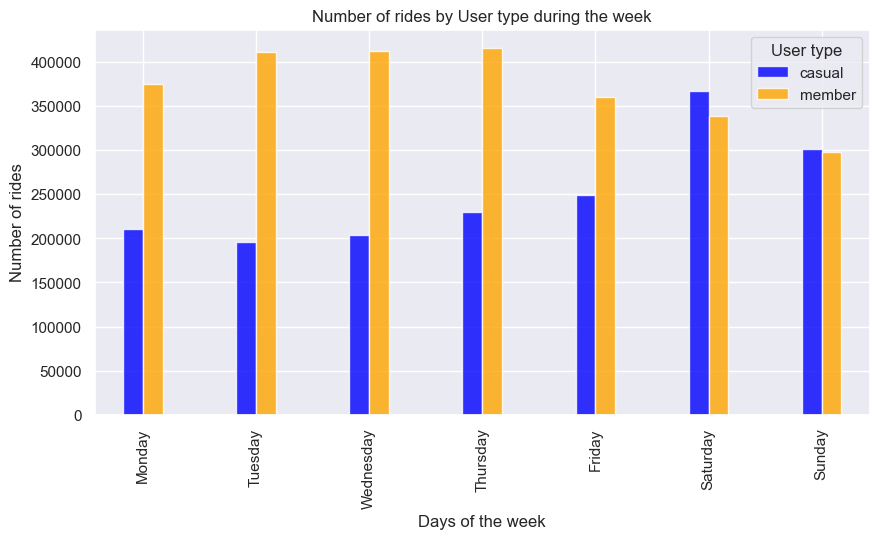

In [10]:
# Calculate the mean time and mean distance by user type
userType_means = df.groupby('member_casual').agg(mean_time=('ride_length', 'mean'), mean_distance=('ride_distance', 'mean')).reset_index()
# print(userType_means)

# Create the plot for mean travel time by user type
plt.figure(figsize=FIG_SIZE)
plt.bar(userType_means['member_casual'], userType_means['mean_time'], color=['blue', 'orange'])
plt.title('Mean travel time by User type')
plt.xlabel('User Type')
plt.ylabel('Mean time in sec')
plt.show()

# Create the plot for mean travel distance by user type
plt.figure(figsize=FIG_SIZE)
plt.bar(userType_means['member_casual'], userType_means['mean_distance'], color=['blue', 'orange'])
plt.title('Mean travel distance by User type')
plt.xlabel('User Type')
plt.ylabel('Mean distance In Km')
plt.show()

# Calculate the number of rides and average duration by user type and weekday
rides_by_weekday = df.groupby(['member_casual', 'day_of_week']).agg(number_of_rides=('ride_length', 'count'), average_duration=('ride_length', 'mean')).reset_index()
# Pivot the df to make 'day_of_week' values as columns
pivot_df = rides_by_weekday.pivot_table(index='day_of_week', columns='member_casual', values='number_of_rides')
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_df = pivot_df.reindex(custom_order)
# print(pivot_df)

# Create the plot for number of rides by user type during the week
bar_width = 0.35
opacity = 0.8
colors = ['blue', 'orange']

fig, ax = plt.subplots(figsize=FIG_SIZE)
pivot_df.plot(kind='bar', width=bar_width, alpha=opacity, color=colors, ax=ax)
plt.title('Number of rides by User type during the week')
plt.xlabel('Days of the week')
plt.ylabel('Number of rides')
plt.legend(title='User type')
plt.show()


### Analysis:

* It seems that the casual users travel the same average distance than the member users, but they have much longer rides, that would indicate a more leisure oriented usage vs a more "public transport" or pragmatic use of the bikes by the annual members.

* This idea is reinforced by the fact that annual users have a very stable use of the service during the week, but the casual users are more of a weekend user. 

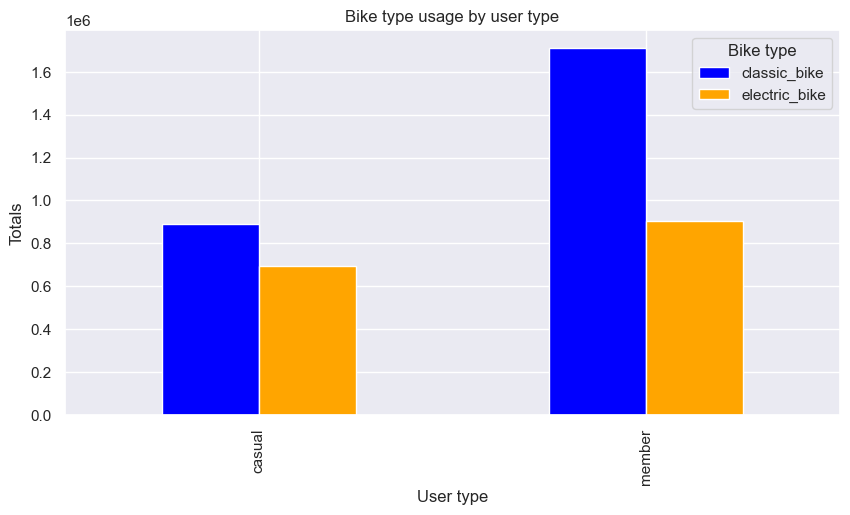

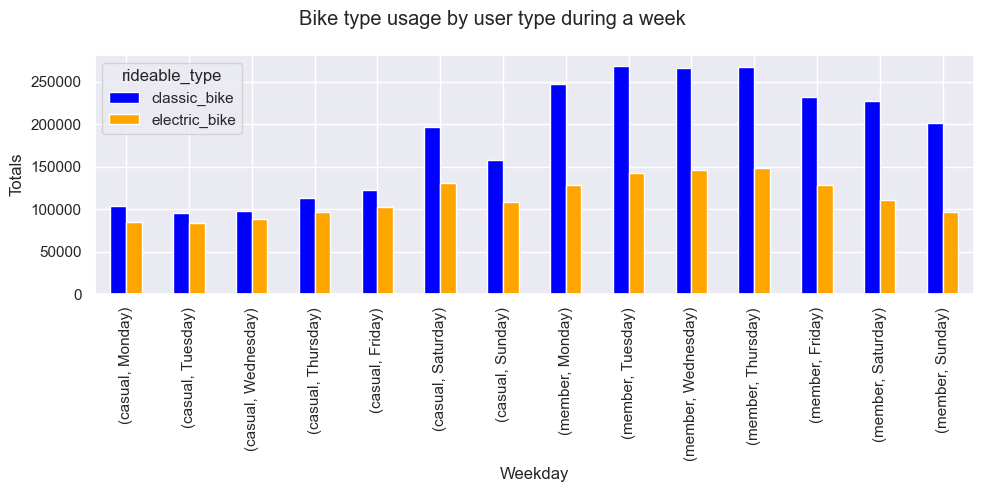

In [42]:
# Create a new DataFrame with rows having info in the "bike type" column
with_bike_type = df[(df['rideable_type'] == 'classic_bike') | (df['rideable_type'] == 'electric_bike')]

# Calculate bike type usage by user type
bike_type_usage = with_bike_type.pivot_table(index='member_casual', columns='rideable_type', aggfunc='size', fill_value=0)
# bike_type_usage = bike_type_usage.reindex(custom_order)

# Plot the bike type usage by user type
fig, ax = plt.subplots(figsize=FIG_SIZE)
bike_type_usage.plot(kind='bar', color=colors, ax=ax)
plt.title('Bike type usage by user type')
plt.xlabel('User type')
plt.ylabel('Totals')
plt.legend(title='Bike type')
plt.show()

# Calculate bike type usage by user type during a week
bike_type_usage_week = with_bike_type.pivot_table(index=['member_casual', 'day_of_week'], columns='rideable_type', aggfunc='size', fill_value=0)
bike_type_usage_week = bike_type_usage_week.reindex(custom_order, level='day_of_week')


# Plot the bike type usage by user type during a week
fig, ax = plt.subplots(figsize=FIG_SIZE)
bike_type_usage_week.plot(kind='bar', color=colors, ax=ax)
plt.suptitle('Bike type usage by user type during a week')
plt.xlabel('Weekday')
plt.ylabel('Totals')
plt.tight_layout()
plt.show()


### Analysis:

* Here we can see that the annual members use both types of bikes for their rides, but the casual users show a clear preference for the classic bikes, which makes sense given the short duration of their rides.

* On a weekly basis we can see that for the annual members there is a small difference of usage between the start of the week, where they prefer the classic bike and the end of the week, where they use more electric bikes.

* For the casual users we see in general the same pattern of usage from the previous weekly charts, preferring the electric vs the classic bikes and having a weekend usage of the service.

In [47]:
# First, create a DataFrame with the most popular routes (>250 times)
coordinates_df = df.loc[(df['start_lng'] != df['end_lng']) & 
                        (df['start_lat'] != df['end_lat'])]\
                .groupby(['start_lng', 'start_lat', 'end_lng', 'end_lat', 'member_casual', 'rideable_type'])\
                .size().reset_index(name='total').query('total > 250')
    

# Create separate DataFrames for each user type
casual_df = coordinates_df.loc[coordinates_df['member_casual'] == 'casual']
member_df = coordinates_df.loc[coordinates_df['member_casual'] == 'member']


# Create a folium map centered on Chicago
chicago_map = folium.Map(location=[41.881832, -87.623177], zoom_start=12)

# Create a feature group for casual rides
casual_group = folium.FeatureGroup(name='Casual')

# Add markers for casual rides
for _, row in casual_df.iterrows():
    start_location = (row['start_lat'], row['start_lng'])
    end_location = (row['end_lat'], row['end_lng'])
#     folium.Marker(start_location).add_to(casual_group)
#     folium.Marker(end_location).add_to(casual_group)
    folium.PolyLine([start_location, end_location], color='blue').add_to(casual_group)

# Create a feature group for member rides
member_group = folium.FeatureGroup(name='Member')

# Add markers for member rides
for _, row in member_df.iterrows():
    start_location = (row['start_lat'], row['start_lng'])
    end_location = (row['end_lat'], row['end_lng'])
#     folium.Marker(start_location).add_to(member_group)
#     folium.Marker(end_location).add_to(member_group)
    folium.PolyLine([start_location, end_location], color='red').add_to(member_group)

# Add feature groups to the map
casual_group.add_to(chicago_map)
member_group.add_to(chicago_map)

# Add layer control to toggle between casual and member rides
folium.LayerControl().add_to(chicago_map)

# Display the map
chicago_map



### Analysis:

* The coordinates data resulted to be very interesting, as we can clearly see **the casual with blue lines** is usually located around the center of the town, with all their trips located around that area which makes sense given that they have a more relaxed leisure rides, on weekends probably also tourist or sightseeing related rides, that naturally focus more on the downtown area where most of the interest points are.

* This contrasts heavily with the longer range of **the annual users with red lines** that connect the downtown with the outskirts of the city, that would suggest they are mostly people that live outside the downtown and use the service to commute everyday to their works in the city.

## PHASE 5 : Share

### Key objectives:

**1.Share my conclusions.:**

* Taking in consideration of the business task: **¿What could motivate the “casual” users to change to an annual subscription based on their behavior?**
    
    1)**The Casual users** have **leisure**, and **tourism** rides mostly on **weekends** and using **classic bikes**.
    
    2)**The Annual users** have **commute** or **pragmatic** rides, during **all week** using both **electric & classic bikes**
    
    
* The insights we've learned from the available data we can make some conclusions that in order to **convert the casual to the annual** users it would be interesting to focus the messages on the **leisure** aspect of the service, and maybe offer some kind of **promotion related to weekends and/or electric bikes**.